# Analisis Exploratorio De Los Datos y Machine Learning

In [1]:
# importamos librerias para el manejo de los datos
import pandas as pd 
import numpy as np
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from datetime import datetime
import json
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.neighbors import NearestNeighbors 

## ANALIS EXPLORATORIO DE LOS DATOS

### Datos

In [15]:
#cargamos el dataset realizado en el ETL
movies = pd.read_csv('Ingenieria_datos/movies_1.csv',parse_dates=['release_date'])

In [16]:
#mostramos numero de filas y columnas del dataset y sus nombres
print(movies.shape)
print(movies.columns)

(45376, 32)
Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_collection', 'name_collection',
       'poster_path_collection', 'backdrop_path_collection', 'id_genres',
       'name_genres', 'id_companies', 'name_companies', 'iso_3166_1_countries',
       'name_countries', 'iso_639_1_languages', 'name_languages',
       'release_year', 'return'],
      dtype='object')


In [21]:
#borramos columnas que fueron desanidadas ya que no tienen relevancia y solo nos quedamos con sus names
movies = movies.drop(['belongs_to_collection','id_collection','poster_path_collection','backdrop_path_collection',
                      'genres','id_genres','id_companies','production_countries','iso_3166_1_countries',
                      'spoken_languages','iso_639_1_languages'], axis=1)

In [20]:
#exportamos el archivo para realizar el EDA
movies.to_csv('movies_eda.csv',index=False, date_format='%Y-%m-%d')

In [21]:
#cargamos el dataframe para realizar el EDA
movies_eda = pd.read_csv('movies_eda.csv',parse_dates=['release_date'])

In [23]:
#mostramos numero de filas y columnas del dataset y sus nombres
print(movies_eda.shape)
print(movies_eda.columns)

(45376, 21)
Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'name_collection', 'name_genres',
       'name_companies', 'name_countries', 'name_languages', 'release_year',
       'return', 'production_companies'],
      dtype='object')


In [24]:
#valores no nulos por columna y tipo de datos
movies_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45376 non-null  int64         
 1   id                    45376 non-null  int64         
 2   original_language     45365 non-null  object        
 3   overview              44435 non-null  object        
 4   popularity            45376 non-null  float64       
 5   release_date          45376 non-null  datetime64[ns]
 6   revenue               45376 non-null  float64       
 7   runtime               45130 non-null  float64       
 8   status                45296 non-null  object        
 9   tagline               20398 non-null  object        
 10  title                 45376 non-null  object        
 11  vote_average          45376 non-null  float64       
 12  vote_count            45376 non-null  float64       
 13  name_collection 

In [25]:
#cantidad de valores nulos por columna
movies_eda.isnull().sum()

budget                      0
id                          0
original_language          11
overview                  941
popularity                  0
release_date                0
revenue                     0
runtime                   246
status                     80
tagline                 24978
title                       0
vote_average                0
vote_count                  0
name_collection         40888
name_genres                 0
name_companies              0
name_countries          13237
name_languages              0
release_year                0
return                      1
production_companies        0
dtype: int64

In [28]:
#realizamos un resumen estadistico de las columnas numericas
#Este resumen estadístico muestra los valores descriptivos de las variables numericas del conjunto de datos. Aquí está la explicación de cada una de las estadísticas:
#count: Representa el número de observaciones no faltantes en cada columna. Por ejemplo, en la columna "budget", hay 45,376 valores no faltantes.
#mean: Es el promedio aritmético de los valores en cada columna. Por ejemplo, el promedio del presupuesto (budget) es de aproximadamente 4,232,604.
#min: Es el valor mínimo en cada columna. Por ejemplo, el valor mínimo de la columna "id" es 2.
#25%: Es el percentil 25, también conocido como el primer cuartil. Indica el valor por debajo del cual cae el 25% de los datos. Por ejemplo, el primer cuartil del tiempo de ejecución (runtime) es 85, lo que significa que el 25% de las películas tienen una duración de 85 minutos o menos.
#50%: Es el percentil 50, también conocido como la mediana. Es el valor que divide los datos en dos partes iguales. Por ejemplo, la mediana del voto promedio (vote_average) es 6.
#75%: Es el percentil 75, también conocido como el tercer cuartil. Indica el valor por debajo del cual cae el 75% de los datos. Por ejemplo, el tercer cuartil del voto promedio es 6.8, lo que significa que el 75% de las películas tienen un voto promedio de 6.8 o menos.
#max: Es el valor máximo en cada columna. Por ejemplo, el valor máximo de la columna "revenue" es aproximadamente 2,787,965,000.
#std: Es la desviación estándar de los valores en cada columna. Representa la dispersión de los datos alrededor de la media. Por ejemplo, la desviación estándar del presupuesto es aproximadamente 17,439,860.
#Algunas de las columnas contienen valores NaN, lo que significa que no se pudo calcular una estadística para esos datos debido a la falta de información.
movies.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,45376.000000,45376,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,4.537500e+04
mean,4.232604e+06,108027.103094,2.926458,1992-05-15 17:10:50.564174848,1.123010e+07,94.181675,5.624070,110.096439,1991.881193,1.048054e+06
min,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,3.000000e+08
std,1.743986e+07,112168.377996,6.009672,NaN,6.438996e+07,38.341059,1.915423,491.742894,24.055360,9.180500e+06


## Graficos

### graficos de histograma

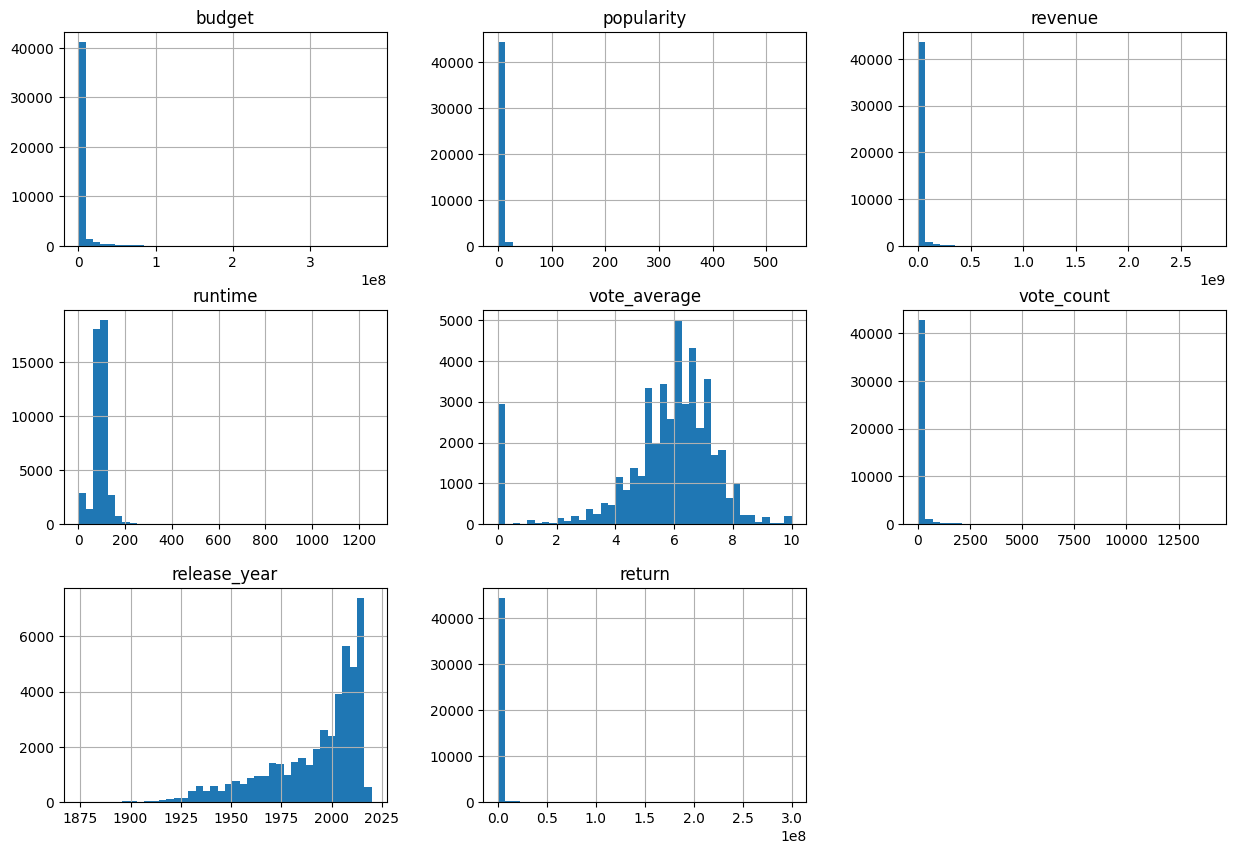

In [25]:
# histogramas de variables numericas
columnas = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'return']
movies_eda[columnas].hist(bins=40, figsize= (15, 10))
plt.show()

De los histogramas realizados, dos de ellos llaman especialmente la atención:

1. Histograma de 'vote_average':
El histograma de 'vote_average' muestra una distribución que se asemeja a una distribución normal. Se observa una concentración mayor de valores alrededor del valor central, lo que indica que la mayoría de las películas tienen un puntaje promedio similar. Esto sugiere que hay una tendencia a otorgar puntajes cercanos al valor central, lo cual puede ser útil para evaluar la calidad promedio de las películas.

2. Histograma de 'release_year':
El histograma de 'release_year' muestra una tendencia interesante. Se observa que hay una mayor cantidad de películas realizadas a medida que pasan los años. Esto puede deberse a factores como el crecimiento de la industria cinematográfica, avances tecnológicos y cambios en la demanda del público. Esta información puede ser relevante para comprender la evolución de la producción cinematográfica a lo largo del tiempo y realizar análisis comparativos entre diferentes períodos.

Estos hallazgos nos proporcionan una visión inicial sobre las distribuciones y las tendencias en las variables 'vote_average' y 'release_year' en el conjunto de datos analizado.

### grafico de correlacion

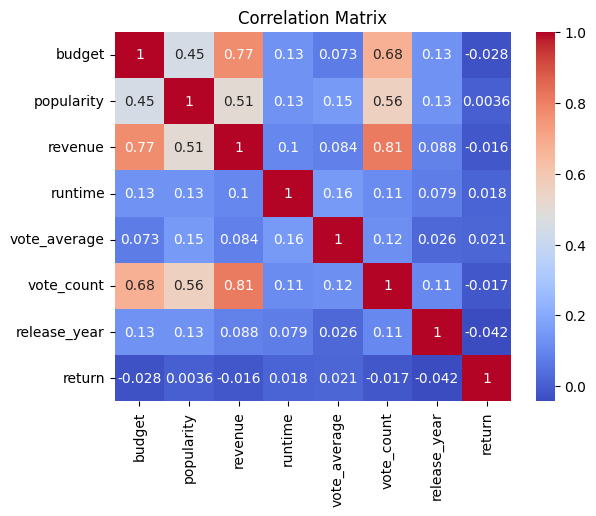

In [33]:
#grafico de correlacion
correlation_matrix = movies_eda[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'return']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observamos en el gráfico de correlación que existen varias relaciones significativas entre las siguientes variables:

- 'revenue' vs 'vote_count'
- 'budget' vs 'revenue'
- 'budget' vs 'vote_count'
- 'popularity' vs 'vote_count'
- 'popularity' vs 'revenue'

Estas correlaciones sugieren una posible relación entre estas variables, lo que significa que podrían influenciarse mutuamente.

Para investigar estas relaciones con mayor detalle, realizaremos los siguientes gráficos:

1. Gráfico de dispersión 'revenue' vs 'vote_count'.
2. Gráfico de dispersión 'budget' vs 'revenue'.
3. Gráfico de dispersión 'budget' vs 'vote_count'.
4. Gráfico de dispersión 'popularity' vs 'vote_count'.
5. Gráfico de dispersión 'popularity' vs 'revenue'.

Estos gráficos nos permitirán visualizar y analizar la relación entre estas variables, identificar posibles patrones o tendencias, y obtener una mejor comprensión de cómo se relacionan entre sí.

### graficos scatterplot

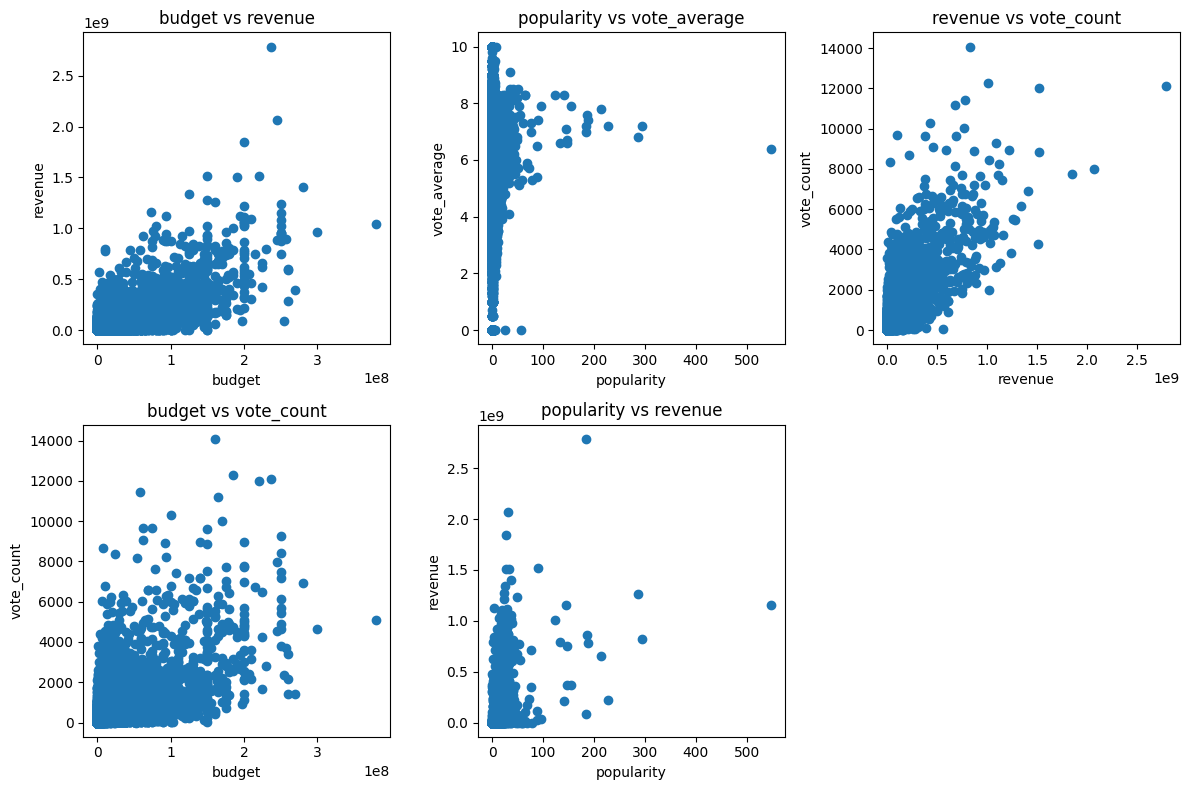

In [42]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Gráfico 1
axes[0, 0].scatter(movies_eda['budget'], movies_eda['revenue'])
axes[0, 0].set_title('budget vs revenue')
axes[0, 0].set_xlabel('budget')
axes[0, 0].set_ylabel('revenue')

# Gráfico 2
axes[0, 1].scatter(movies_eda['popularity'], movies_eda['vote_average'])
axes[0, 1].set_title('popularity vs vote_average')
axes[0, 1].set_xlabel('popularity')
axes[0, 1].set_ylabel('vote_average')

# Gráfico 3
axes[0, 2].scatter(movies_eda['revenue'], movies_eda['vote_count'])
axes[0, 2].set_title('revenue vs vote_count')
axes[0, 2].set_xlabel('revenue')
axes[0, 2].set_ylabel('vote_count')

# Gráfico 4
axes[1, 0].scatter(movies_eda['budget'], movies_eda['vote_count'])
axes[1, 0].set_title('budget vs vote_count')
axes[1, 0].set_xlabel('budget')
axes[1, 0].set_ylabel('vote_count')

# Gráfico 5
axes[1, 1].scatter(movies_eda['popularity'], movies_eda['revenue'])
axes[1, 1].set_title('popularity vs revenue')
axes[1, 1].set_xlabel('popularity')
axes[1, 1].set_ylabel('revenue')

# Eliminar el último subplot vacío
fig.delaxes(axes[1, 2])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con los gráficos
plt.show()


podrianos preguntarnos lo siguiente
- Son las películas populares las más rentables?
- las peliculas con mayor gasto tienen mayor recaudacion?
- las peliculas con mayor gasto tienen mayor votacion?
- las peliculas populares tienen mayor votacion?
- las peliculas de mayor recaudo tienen mayor votacion?

de todos estos graficos no podemos afirmar que exista dicha relación

### graficos boxplot

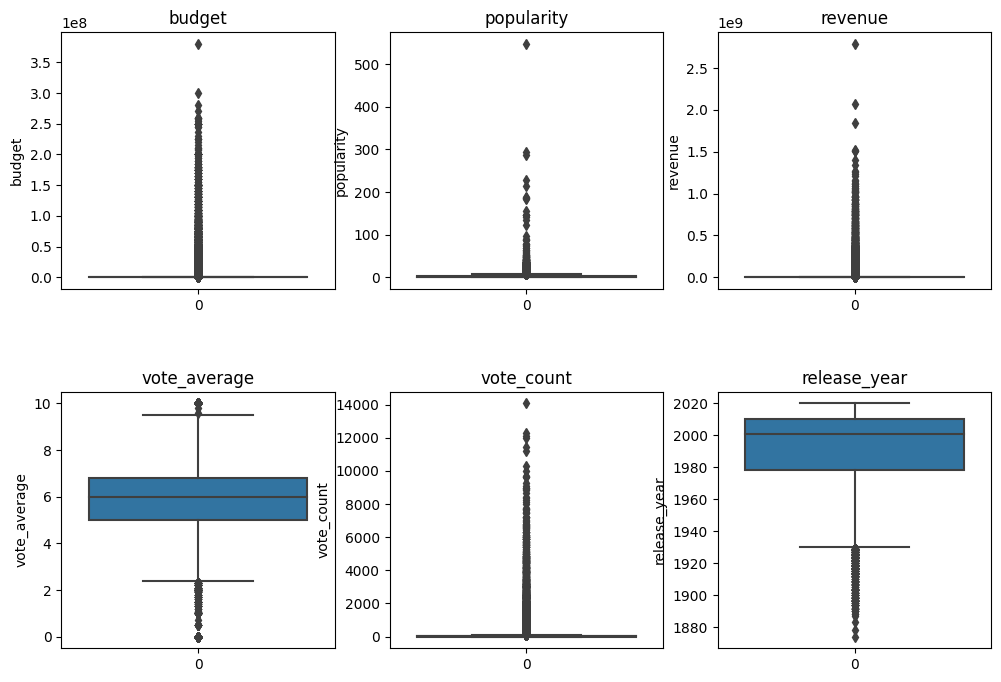

In [50]:
# Columnas numéricas
columnas = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count', 'release_year']

# Crear subplots en una cuadrícula de 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)  # Espacio vertical entre subplots

# Iterar sobre las columnas y generar los boxplots
for i, columna in enumerate(columnas):
    row = i // 3  # Fila correspondiente
    col = i % 3  # Columna correspondiente
    sns.boxplot(data=movies_eda[columna], ax=axs[row, col])
    axs[row, col].set_title(columna)
    axs[row, col].set_ylabel(columna)

# Mostrar el gráfico
plt.show()

#obsevamos muchos valores atipicos en todos los graficos

### graficos de barras por genero

In [30]:
# Convertimos la columna 'genres' de string a lista de diccionarios
movies_eda['name_genres'] = movies_eda['genres'].apply(ast.literal_eval)
# Extraemos el nombre de cada genero y cramos una nueva columna con la lista de nombres de generos
movies_eda['name_genres'] = movies_eda['name_genres'].apply(lambda x: [d['name'] for d in x])
# Expandimos la lista de nombres de géneros
generos_expandidos = movies_eda['name_genres'].explode()
# Contamos la frecuencia de cada valor en la columna 'genre_names'
conteo_generos = generos_expandidos.value_counts()
# Eliminamos los géneros que solo aparecen una vez
conteo_generos = conteo_generos[conteo_generos > 1]

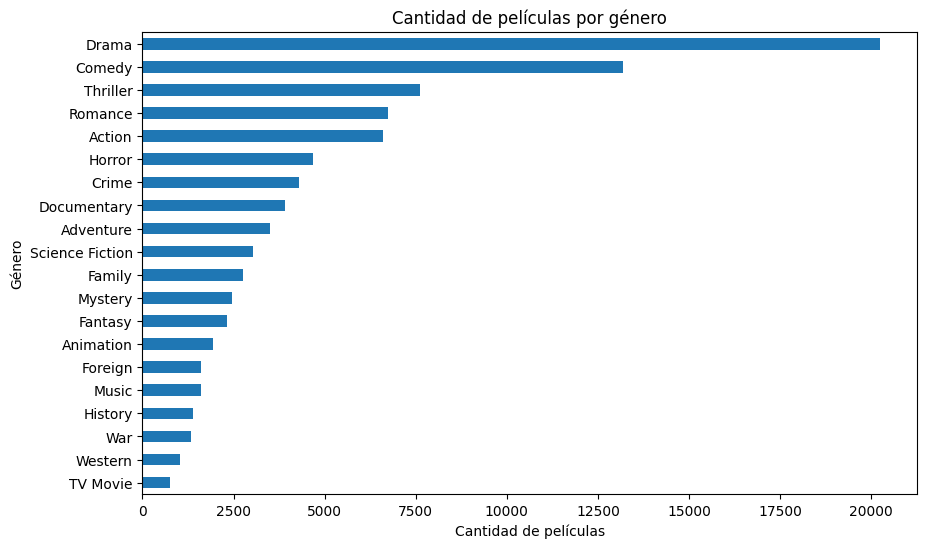

In [39]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los géneros por cantidad de películas

plt.figure(figsize=(10,6)) 
conteo_generos.plot(kind='barh')  
plt.title('Cantidad de películas por género')  
plt.xlabel('Cantidad de películas')  
plt.ylabel('Género')  
plt.show() 

- Observamos que los géneros de drama y comedia son los que tienen la mayor cantidad de películas en nuestro conjunto de datos. Esto sugiere que estas dos categorías son populares entre los productores y los espectadores.

### nube de palabras

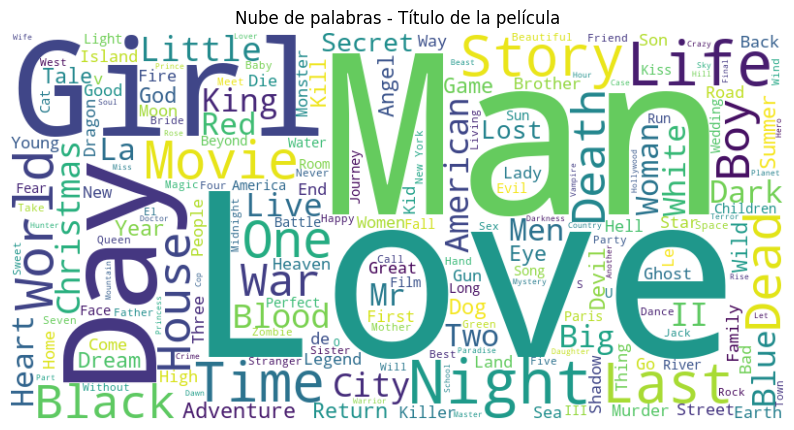

In [5]:
# Concatenar los títulos de las películas
titles = ' '.join(movies_eda['title'])

# Crear la instancia de WordCloud para el título
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Configurar y mostrar el gráfico del título
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Título de la película')
plt.show()


- El gráfico de nube de palabras del título de las películas muestra los términos más frecuentes que aparecen en los títulos. Al observar el gráfico, podemos identificar los principales temas o géneros que predominan en las películas de nuestro conjunto de datos. Los términos más grandes indican los títulos que aparecen con más frecuencia.

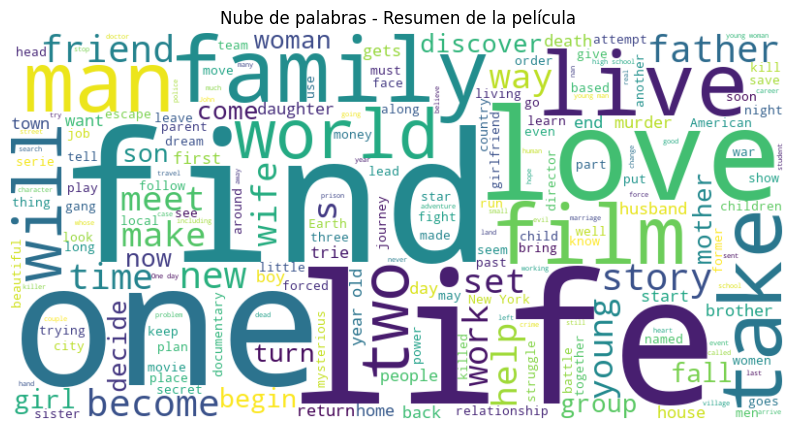

In [7]:
# Concatenar los resúmenes de las películas convirtiéndolos a cadenas de caracteres
overviews = ' '.join(movies_eda['overview'].astype(str))

# Crear la instancia de WordCloud para el resumen
overview_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overviews)

# Configurar y mostrar el gráfico del resumen
plt.figure(figsize=(10, 6))
plt.imshow(overview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Resumen de la película')
plt.show()



- El gráfico de nube de palabras del resumen de las películas muestra los términos más frecuentes en los resúmenes de las películas. Al examinar el gráfico, podemos identificar los temas o conceptos clave que se mencionan con más frecuencia en los resúmenes. Los términos más grandes en la nube de palabras representan los conceptos o elementos más destacados en los resúmenes de las películas. Estos términos pueden ser útiles para comprender los temas principales de las películas, las tramas o los aspectos sobresalientes que se destacan en los resúmenes.

### grafico por fecha

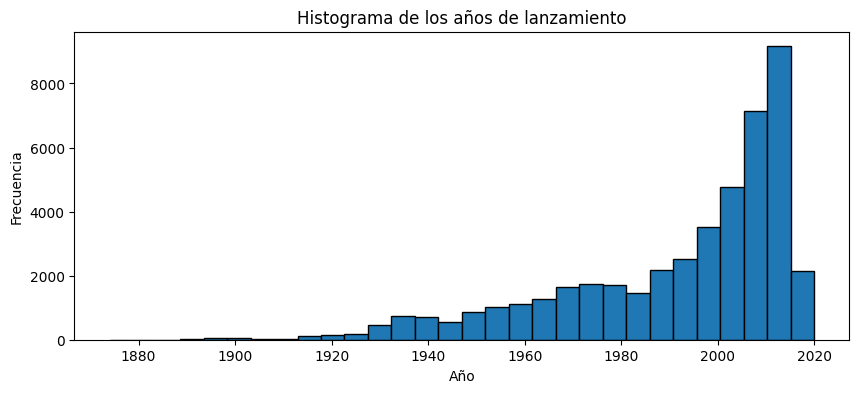

In [10]:
# Crear el histograma
plt.figure(figsize=(10, 4))  # Ajustar el tamaño de la figura según tus preferencias
plt.hist(movies_eda['release_year'], bins=30, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de los años de lanzamiento')

# Mostrar el histograma
plt.show()


- Observamos en el gráfico que la cantidad de películas ha experimentado un crecimiento continuo desde el año 1970. Esta tendencia ascendente sugiere un aumento constante en la producción y estreno de películas a lo largo del tiempo.

## Machine Learning

## filtrado

In [28]:
# filtramos el dataset desde el año 1970 donde se ven que aumentan la cantidad de peliculas creadas
movies_ml = movies_eda[(movies_eda['release_year'] >= 1970)]
print(movies_ml.shape)

(37087, 21)


In [29]:
# Convertimos todos los valores en la columna 'overview' a strings
movies_ml['overview'] = movies_ml['overview'].astype(str)

C:\Users\mwmar\AppData\Local\Temp\ipykernel_9596\904291328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['overview'] = movies_ml['overview'].astype(str)


In [30]:
# Concatenamos todas las descripciones de las películas en una sola cadena de texto
text = ' '.join(movies_ml['overview'].astype(str))

In [31]:
# Eliminamos los duplicados basándonos en la columna 'title'
movies_ml = movies_ml.drop_duplicates(subset='title')

# Recreamos el índice de los títulos luego de eliminar los duplicados
indices = pd.Series(movies_ml.index, index=movies_ml['title']).drop_duplicates()

# Observamos las nuevas dimensiones
movies_ml.shape

(34969, 21)

In [32]:
# filtramos nuestro dataset con las peliculas con mayor puntaje y haci poder obtener una recomendacion alta

# Convertimos la columna a float
movies_ml['vote_average'] = pd.to_numeric(movies_ml['vote_average'], errors='coerce')

# Ordenamos por vote_average y tomamos las primeras 10000 filas
movies_ml = movies_ml.sort_values(by='vote_average', ascending=False).head(10000).reset_index(drop=True)

#observamos nuevas dimensiones
movies_ml.shape

(10000, 21)

## modelo de recomendacion

In [9]:

# Aseguramos que los datos de la columna 'overview' sean strings
movies_ml['overview'] = movies_ml['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'name_genres' sean strings
movies_ml['name_genres'] = movies_ml['name_genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazamos los valores NaN con cadenas vacías en la columna 'production_companies'
movies_ml['production_companies'] = movies_ml['production_companies'].fillna('')

# Convertimos la columna 'production_companies' a string si es necesario
movies_ml['production_companies'] = movies_ml['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Creamos una nueva columna combinando las características de interés
movies_ml['combined_features'] = movies_ml['overview'] + ' ' + movies_ml['name_genres'] + ' ' + movies_ml['production_companies']

# Convertimos todos los textos a minusculas para evitar duplicados
movies_ml['combined_features'] = movies_ml['combined_features'].str.lower()

In [ ]:
# Exportamos el csv para poder ser consumido por la API

movies_ml.to_csv('movies_ml.csv', index=False)

In [ ]:
#cargamos el dataset realizado en el ETL
movies_ml = pd.read_csv('movies_ml.csv',parse_dates=['release_date'])

In [12]:
# modelo de recomendación


#   Creamos una matriz de conteo usando CountVectorizer que convierte los textos en una matriz de frecuencias de palabras.
cv = CountVectorizer(stop_words='english', max_features=5000)
count_matrix = cv.fit_transform(movies_ml['combined_features'])

# Creamos un modelo para encontrar los vecinos mas cercanos en un espacio de caracteristicas
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(count_matrix)

# Creamos un indice de titulos de peliculas y eliminamos los duplicados
indices = pd.Series(movies_ml.index, index=movies_ml['title']).drop_duplicates()

## funcion

In [13]:
# Definimos la función que tendrá el endpoint en la API y en Render
# La función toma el título de una película y devuelve una lista de las 5 películas más similares 
def recomendacion(titulo):
    '''Ingresas un nombre de pelicula y te recomienda 5 similares
    '''
    # Verificamos si el titulo ingresado se encuentra en el dataset
    if titulo not in movies_ml['title'].values:
        return 'La pelicula no se encuentra en el conjunto de la base de datos.'
    else:
        # Obtenemos el índice de la película que coincide con el título
        index = indices[titulo]

        # Obtenemos las puntuaciones de similitud de las 5 peliculas más cercanas
        distances, indices_knn = nn.kneighbors(count_matrix[index], n_neighbors=6)  

        # Obtenemos los indices de las peliculas
        movie_indices = indices_knn[0][1:]  

        # Devolvemos las 5 peliculas mas similares
        return {'lista recomendada': movies_ml['title'].iloc[movie_indices].tolist()}

In [14]:
print(recomendacion("Toy Story"))

{'lista recomendada': ['Toy Story 3', 'Toy Story 2', 'Hawaiian Vacation', 'Lou', "A Bug's Life"]}
